###**Class imbalance 문제 해결 & yy_b를 정수형으로 변환한 smote_df_1 import**


In [ ]:
import io
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score
import keras
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder

In [ ]:
# smote_df_1 가져오기
from google.colab import files
myfile=files.upload()

Saving trainset.csv to trainset.csv


###**불균형 데이터 균형 맞추고 csv 파일로 저장**

In [ ]:
# 라벨 인코더는 지정한 순서대로 라벨을 만들어 주지 않는다.
# 그렇게 하고 싶으면 함수를 재정의 해야한다.
# 참고 링크: https://www.debugcn.com/ko/article/26512250.html

# 실행X
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d

# 라벨인코더 재정의
class MyLabelEncoder(LabelEncoder):

    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

In [ ]:
data = pd.read_csv(io.BytesIO(myfile['trainset.csv']))
data=data.drop(columns=['Id', 'Y_c', 'yy_c', 'mm_c', 'mm_b']) # 안 쓰는 변수 제거
data.head()

,C,Y_b,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,...,BX21,BX22,BX23,BX24,BX25,BX26,BX27,BX28,BX29,BX30,BX31,BX32,BX33,BX34,BX35,BX36,BX37,BX38,BX39,BX40,BX41,BX42,BX43,BX44,BX45,BX46,BX47,BX49,BX50,BX51,BX52,BX53,BX54,BX55,BX56,BX57,BX58,BX59,BX60,yy_b
0,-1,AA+,22.383724,22.128057,20.546765,22.210202,8.331105,1.041042,-0.382176,58,0.174074,13.796952,-7.150123,-0.024824,0.010184,0.063153,0.039737,0.047798,0.018831,-0.621855,0.065031,0.064817,1.053593,-0.003308,-0.003841,0.114455,0.061723,-0.004960,0.885545,0.052732,-0.016081,17.013179,0.159301,0.010184,0.267607,0.234077,1.530844,0.713886,0.493392,0.932059,...,1.316730,-0.017948,-0.003323,0.115882,0.056666,-0.004603,0.884118,0.059216,-0.065824,14.162630,0.196878,0.016816,0.272419,0.241213,1.622491,0.753791,0.506855,0.993417,1.007513,3.869614,2.707154,1.372134,0.330942,0.632885,0.245141,-0.003509,0.024012,18.715408,0.780712,1.153126,0.010272,0.008250,-0.065530,-0.072887,15.046856,1.609134,0.722055,2.950170,7.179745,1997
1,-1,A,20.184873,19.906590,18.216023,20.034495,6.315358,0.880409,-0.545045,43,0.174074,13.591232,5.784040,0.010394,0.017520,0.057560,0.048016,0.042984,0.018831,0.189408,0.081739,0.079748,1.439674,-0.024963,0.001451,0.100284,0.056776,0.001917,0.899716,0.043508,-0.135363,17.013179,0.139617,0.017520,0.076551,0.136176,1.596068,0.945048,0.439255,1.094028,...,1.206611,-0.012946,0.002257,0.104049,0.062658,0.002779,0.895951,0.041390,-0.082338,12.543782,0.127709,0.019913,0.076551,0.258583,0.929468,0.933123,0.654066,1.258566,0.711496,6.123913,4.034517,2.309551,0.297859,0.708990,0.146406,0.136358,0.007096,18.223464,0.844509,0.563029,-0.030763,-0.026834,-0.034293,-0.036829,13.671127,1.444607,0.812241,2.966269,4.625441,1997
2,0,BBB,21.026399,19.623518,17.221982,21.170458,7.671361,0.979021,-0.545045,42,0.174074,12.172528,-0.267213,0.240345,-0.129443,-0.041703,0.085964,-0.034289,0.003062,-5.264545,0.104237,0.097745,-0.945759,-0.116040,-0.101932,0.038197,-0.047666,-0.146520,0.961803,0.113158,0.274954,17.013179,0.118339,-0.129443,0.692466,0.011330,1.091126,0.319425,0.776332,0.495617,...,2.397373,-0.116040,-0.065861,0.087675,0.012465,-0.146520,0.912325,0.075210,-0.333624,12.822377,0.118339,-0.070151,0.692466,0.342592,0.689131,0.346003,1.229036,0.526314,1.361668,6.123913,4.034517,2.309551,0.344134,0.751389,0.133747,-0.205083,-0.023834,17.572121,0.058201,0.435633,-0.039685,-0.038299,-0.181887,-0.156031,37.349959,1.013982,0.370970,2.727980,5.430017,1997
3,-1,A+,21.322081,21.067553,20.126214,20.961911,8.131825,1.137434,-0.075908,42,0.174074,12.935729,-5.193739,0.004219,0.022513,0.074403,0.052825,0.057377,0.018831,0.138225,0.086533,0.085463,1.169247,-0.012526,0.001276,0.111693,0.074007,0.001646,0.888307,0.037686,-0.032108,14.673233,0.302442,0.022513,0.451714,0.198101,1.650138,0.598405,0.451540,0.746235,...,1.209369,-0.014650,0.006989,0.106502,0.069972,0.007435,0.893498,0.036530,-0.104062,6.313040,0.132332,0.030286,0.354025,0.241267,1.717064,0.653632,0.469319,0.861478,1.199768,5.899879,4.034517,2.094303,0.382395,0.660291,0.152515,-0.081800,0.029256,19.164520,0.830141,2.110466,0.101802,0.088331,0.070543,0.065115,9.999484,1.923207,0.939994,4.854726,5.030613,1997
4,0,AA-,19.975171,19.635487,18.909031,19.553065,6.858565,0.932399,0.008580,42,0.239319,12.776922,-33.644871,-0.043416,0.004551,0.046257,0.049430,0.027739,0.011753,-3.537565,0.065937,0.064205,1.692427,-0.026977,-0.014950,0.188970,0.038960,-0.020997,0.811030,0.150010,-0.055782,7.956532,0.344335,0.004551,0.357530,0.335760,1.334028,0.875906,0.635180,1.318658,...,1.952505,-0.033657,-0.023878,0.166282,0.035335,-0.037372,0.833718,0.130947,-0.063286,4.588228,0.339781,0.027357,0.497970,0.381397,2.939148,0.557548,0.334706,0.901301,1.096611,1.762613,1.455807,0.487268,0.273604,0.411969,0.514648,-0.048822,0.004076,18.744605,0.600945,3.007393,0.134023,0.088484,0.069055,0.071358,15.552325,1.141874,0.638910,3.570284,8.855187,1997


In [ ]:
data['Y_b']=data['Y_b'].replace({'D':'0', 'C':'1','CC':'2','CCC-':'3','CCC':'4',
                                 'B-':'5','B':'6','B+':'7','BB-':'8','BB':'9',
                                 'BB+':'10','BBB-':'11','BBB':'12','BBB+':'13',
                                 'A-':'14','A':'15','A+':'16','AA-':'17','AA':'18',
                                 'AA+':'19','AAA':'20'})

data['Y_b'] = data['Y_b'].astype('int64')
data

,C,Y_b,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,...,BX21,BX22,BX23,BX24,BX25,BX26,BX27,BX28,BX29,BX30,BX31,BX32,BX33,BX34,BX35,BX36,BX37,BX38,BX39,BX40,BX41,BX42,BX43,BX44,BX45,BX46,BX47,BX49,BX50,BX51,BX52,BX53,BX54,BX55,BX56,BX57,BX58,BX59,BX60,yy_b
0,-1,19,22.383724,22.128057,20.546765,22.210202,8.331105,1.041042,-0.382176,58,0.174074,13.796952,-7.150123,-0.024824,0.010184,0.063153,0.039737,0.047798,0.018831,-0.621855,0.065031,0.064817,1.053593,-0.003308,-0.003841,0.114455,0.061723,-0.004960,0.885545,0.052732,-0.016081,17.013179,0.159301,0.010184,0.267607,0.234077,1.530844,0.713886,0.493392,0.932059,...,1.316730,-0.017948,-0.003323,0.115882,0.056666,-0.004603,0.884118,0.059216,-0.065824,14.162630,0.196878,0.016816,0.272419,0.241213,1.622491,0.753791,0.506855,0.993417,1.007513,3.869614,2.707154,1.372134,0.330942,0.632885,0.245141,-0.003509,0.024012,18.715408,0.780712,1.153126,0.010272,0.008250,-0.065530,-0.072887,15.046856,1.609134,0.722055,2.950170,7.179745,1997
1,-1,15,20.184873,19.906590,18.216023,20.034495,6.315358,0.880409,-0.545045,43,0.174074,13.591232,5.784040,0.010394,0.017520,0.057560,0.048016,0.042984,0.018831,0.189408,0.081739,0.079748,1.439674,-0.024963,0.001451,0.100284,0.056776,0.001917,0.899716,0.043508,-0.135363,17.013179,0.139617,0.017520,0.076551,0.136176,1.596068,0.945048,0.439255,1.094028,...,1.206611,-0.012946,0.002257,0.104049,0.062658,0.002779,0.895951,0.041390,-0.082338,12.543782,0.127709,0.019913,0.076551,0.258583,0.929468,0.933123,0.654066,1.258566,0.711496,6.123913,4.034517,2.309551,0.297859,0.708990,0.146406,0.136358,0.007096,18.223464,0.844509,0.563029,-0.030763,-0.026834,-0.034293,-0.036829,13.671127,1.444607,0.812241,2.966269,4.625441,1997
2,0,12,21.026399,19.623518,17.221982,21.170458,7.671361,0.979021,-0.545045,42,0.174074,12.172528,-0.267213,0.240345,-0.129443,-0.041703,0.085964,-0.034289,0.003062,-5.264545,0.104237,0.097745,-0.945759,-0.116040,-0.101932,0.038197,-0.047666,-0.146520,0.961803,0.113158,0.274954,17.013179,0.118339,-0.129443,0.692466,0.011330,1.091126,0.319425,0.776332,0.495617,...,2.397373,-0.116040,-0.065861,0.087675,0.012465,-0.146520,0.912325,0.075210,-0.333624,12.822377,0.118339,-0.070151,0.692466,0.342592,0.689131,0.346003,1.229036,0.526314,1.361668,6.123913,4.034517,2.309551,0.344134,0.751389,0.133747,-0.205083,-0.023834,17.572121,0.058201,0.435633,-0.039685,-0.038299,-0.181887,-0.156031,37.349959,1.013982,0.370970,2.727980,5.430017,1997
3,-1,16,21.322081,21.067553,20.126214,20.961911,8.131825,1.137434,-0.075908,42,0.174074,12.935729,-5.193739,0.004219,0.022513,0.074403,0.052825,0.057377,0.018831,0.138225,0.086533,0.085463,1.169247,-0.012526,0.001276,0.111693,0.074007,0.001646,0.888307,0.037686,-0.032108,14.673233,0.302442,0.022513,0.451714,0.198101,1.650138,0.598405,0.451540,0.746235,...,1.209369,-0.014650,0.006989,0.106502,0.069972,0.007435,0.893498,0.036530,-0.104062,6.313040,0.132332,0.030286,0.354025,0.241267,1.717064,0.653632,0.469319,0.861478,1.199768,5.899879,4.034517,2.094303,0.382395,0.660291,0.152515,-0.081800,0.029256,19.164520,0.830141,2.110466,0.101802,0.088331,0.070543,0.065115,9.999484,1.923207,0.939994,4.854726,5.030613,1997
4,0,17,19.975171,19.635487,18.909031,19.553065,6.858565,0.932399,0.008580,42,0.239319,12.776922,-33.644871,-0.043416,0.004551,0.046257,0.049430,0.027739,0.011753,-3.537565,0.065937,0.064205,1.692427,-0.026977,-0.014950,0.188970,0.038960,-0.020997,0.811030,0.150010,-0.055782,7.956532,0.344335,0.004551,0.357530,0.335760,1.334028,0.875906,0.635180,1.318658,...,1.952505,-0.033657,-0.023878,0.166282,0.035335,-0.037372,0.833718,0.130947,-0.063286,4.588228,0.339781,0.027357,0.497970,0.381397,2.939148,0.557548,0.334706,0.901301,1.096611,1.762613,1.455807,0.487268,0.273604,0.411969,0.514648,-0.048822,0.004076,18.744605,0.600945,3.007393,0.134023,0.088484,0.069055,0.071358,15.552325,1.141874,0.638910,3.570284,8.855187,1997
...,...,...,...,...,

In [ ]:
#train_set_new = data[data['yy_b']<=2014]   => perfect.csv 파일 생성시 아래 코드 주석처리 및 해당 코드 주석 풀기
train_set_new=data
target_column = ['C']

data_valid= train_set_new.values
data_valid

array([[-1.00000000e+00,  1.90000000e+01,  2.23837241e+01, ...,
         2.95017009e+00,  7.17974543e+00,  1.99700000e+03],
       [-1.00000000e+00,  1.50000000e+01,  2.01848727e+01, ...,
         2.96626926e+00,  4.62544120e+00,  1.99700000e+03],
       [ 0.00000000e+00,  1.20000000e+01,  2.10263990e+01, ...,
         2.72798017e+00,  5.43001700e+00,  1.99700000e+03],
       ...,
       [ 0.00000000e+00,  1.60000000e+01,  2.07848700e+01, ...,
         6.60420100e+00,  9.41306300e+00,  2.01500000e+03],
       [-1.00000000e+00,  1.40000000e+01,  2.15627000e+01, ...,
         1.65357200e+01,  3.14586100e+01,  2.01500000e+03],
       [ 0.00000000e+00,  1.60000000e+01,  2.05117000e+01, ...,
         3.18409200e+00,  9.96207700e+00,  2.01500000e+03]])

In [ ]:
# input, output 분리
X, y = data_valid[:, 1:], data_valid[:, 0]

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(train_set_new.drop(columns=['C']), train_set_new['C'])

Class=-1, n=2131 (33.333%)
Class=0, n=2131 (33.333%)
Class=1, n=2131 (33.333%)


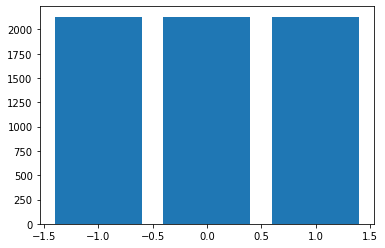

In [ ]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
smote_data = X.copy()
smote_data['C'] = y
smote_data.head()

,Y_b,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,BX22,BX23,BX24,BX25,BX26,BX27,BX28,BX29,BX30,BX31,BX32,BX33,BX34,BX35,BX36,BX37,BX38,BX39,BX40,BX41,BX42,BX43,BX44,BX45,BX46,BX47,BX49,BX50,BX51,BX52,BX53,BX54,BX55,BX56,BX57,BX58,BX59,BX60,yy_b,C
0,19,22.383724,22.128057,20.546765,22.210202,8.331105,1.041042,-0.382176,58,0.174074,13.796952,-7.150123,-0.024824,0.010184,0.063153,0.039737,0.047798,0.018831,-0.621855,0.065031,0.064817,1.053593,-0.003308,-0.003841,0.114455,0.061723,-0.004960,0.885545,0.052732,-0.016081,17.013179,0.159301,0.010184,0.267607,0.234077,1.530844,0.713886,0.493392,0.932059,1.088378,...,-0.017948,-0.003323,0.115882,0.056666,-0.004603,0.884118,0.059216,-0.065824,14.162630,0.196878,0.016816,0.272419,0.241213,1.622491,0.753791,0.506855,0.993417,1.007513,3.869614,2.707154,1.372134,0.330942,0.632885,0.245141,-0.003509,0.024012,18.715408,0.780712,1.153126,0.010272,0.008250,-0.065530,-0.072887,15.046856,1.609134,0.722055,2.950170,7.179745,1997,-1
1,15,20.184873,19.906590,18.216023,20.034495,6.315358,0.880409,-0.545045,43,0.174074,13.591232,5.784040,0.010394,0.017520,0.057560,0.048016,0.042984,0.018831,0.189408,0.081739,0.079748,1.439674,-0.024963,0.001451,0.100284,0.056776,0.001917,0.899716,0.043508,-0.135363,17.013179,0.139617,0.017520,0.076551,0.136176,1.596068,0.945048,0.439255,1.094028,0.860245,...,-0.012946,0.002257,0.104049,0.062658,0.002779,0.895951,0.041390,-0.082338,12.543782,0.127709,0.019913,0.076551,0.258583,0.929468,0.933123,0.654066,1.258566,0.711496,6.123913,4.034517,2.309551,0.297859,0.708990,0.146406,0.136358,0.007096,18.223464,0.844509,0.563029,-0.030763,-0.026834,-0.034293,-0.036829,13.671127,1.444607,0.812241,2.966269,4.625441,1997,-1
2,12,21.026399,19.623518,17.221982,21.170458,7.671361,0.979021,-0.545045,42,0.174074,12.172528,-0.267213,0.240345,-0.129443,-0.041703,0.085964,-0.034289,0.003062,-5.264545,0.104237,0.097745,-0.945759,-0.116040,-0.101932,0.038197,-0.047666,-0.146520,0.961803,0.113158,0.274954,17.013179,0.118339,-0.129443,0.692466,0.011330,1.091126,0.319425,0.776332,0.495617,1.545983,...,-0.116040,-0.065861,0.087675,0.012465,-0.146520,0.912325,0.075210,-0.333624,12.822377,0.118339,-0.070151,0.692466,0.342592,0.689131,0.346003,1.229036,0.526314,1.361668,6.123913,4.034517,2.309551,0.344134,0.751389,0.133747,-0.205083,-0.023834,17.572121,0.058201,0.435633,-0.039685,-0.038299,-0.181887,-0.156031,37.349959,1.013982,0.370970,2.727980,5.430017,1997,0
3,16,21.322081,21.067553,20.126214,20.961911,8.131825,1.137434,-0.075908,42,0.174074,12.935729,-5.193739,0.004219,0.022513,0.074403,0.052825,0.057377,0.018831,0.138225,0.086533,0.085463,1.169247,-0.012526,0.001276,0.111693,0.074007,0.001646,0.888307,0.037686,-0.032108,14.673233,0.302442,0.022513,0.451714,0.198101,1.650138,0.598405,0.451540,0.746235,1.256871,...,-0.014650,0.006989,0.106502,0.069972,0.007435,0.893498,0.036530,-0.104062,6.313040,0.132332,0.030286,0.354025,0.241267,1.717064,0.653632,0.469319,0.861478,1.199768,5.899879,4.034517,2.094303,0.382395,0.660291,0.152515,-0.081800,0.029256,19.164520,0.830141,2.110466,0.101802,0.088331,0.070543,0.065115,9.999484,1.923207,0.939994,4.854726,5.030613,1997,-1
4,17,19.975171,19.635487,18.909031,19.553065,6.858565,0.932399,0.008580,42,0.239319,12.776922,-33.644871,-0.043416,0.004551,0.046257,0.049430,0.027739,0.011753,-3.537565,0.065937,0.064205,1.692427,-0.026977,-0.014950,0.188970,0.038960,-0.020997,0.811030,0.150010,-0.055782,7.956532,0.344335,0.004551,0.357530,0.335760,1.334028,0.875906,0.635180,1.318658,0.786697,...,-0.033657,-0.023878,0.166282,0.035335,-0.037372,0.833718,0.130947,-0.063286,4.588228,0.339781,0.027357,0.497970,0.381397,2.939148,0.557548,0.334706,0.901301,1.096611,1.762613,1.455807,0.487268,0.273604,0.411969,0.514648,-0.048822,0.004076,18.744605,0.600945,3.007393,0.134023,0.088484,0.069055,0.071358,15.552325,1.141874,0.638910,3.570284,8.855187,1997,0


In [ ]:
# 저장
#smote_data.to_csv("prefect_data.csv", mode='w')
smote_data.to_csv("total_smote_data.csv", mode='w')